# LetsGrowMore (Data Science Intrenship)


## Task 2 :- Stock Market Prediction And Forecasting Using Stacked LSTM

### Project By :-  Pooja Sambhaji Shedge

# 1. Importing Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 2. Loading  Dataset

In [11]:
data = pd.read_csv('stock_market.csv')

In [12]:
#first five rows of the dataset
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [13]:
#last five rows of the dataset
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# 3. Sorting Dataset According to Date

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# 4. Index is Not in order So Making it in Order

In [15]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# 5. Plotting the graph of Stocks at Close

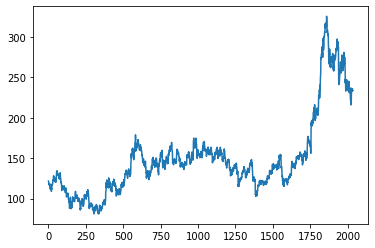

In [16]:
plt.plot(df['Close'])

In [17]:
df1 = df['Close']

# 6. Feature Scaling

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# 7. Splitting the Data into Training and Test Sets

In [19]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]
training_size, test_size

(1424, 611)

# 8. Convert An Array of Values Into a Dataset Matrix

In [20]:
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

# 9. Reshape Input which is Required for LSTM

In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 10. Building the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 14s 330ms/step - loss: 0.0121 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 4s 203ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 4s 201ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 4/60
19/19 [==============================] - 4s 198ms/step - loss: 8.9606e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 192ms/step - loss: 8.3761e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 199ms/step - loss: 8.4294e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 189ms/step - loss: 7.9334e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 4s 193ms/step - loss: 7.5421e-04 - val_loss: 9.6444e-04
Epoch 9/60
19/19 [==============================] - 4s 198ms/step - loss: 7.2609e-04 - val_loss: 8.9519e-04
Epoch 10/60
19/19 [==============================] - 4s 198ms/step 

# 11. Prediction of Scaled Test Set

In [26]:
test_predict = model.predict(X_test)

# 12. Transform to Original Test Set

In [27]:
test_predict1 = scaler.inverse_transform(test_predict)
test_predict1

array([[141.98163 ],
       [142.12546 ],
       [141.35321 ],
       [138.9011  ],
       [136.94485 ],
       [136.30629 ],
       [137.54771 ],
       [139.42569 ],
       [140.10799 ],
       [139.51534 ],
       [138.73074 ],
       [139.44423 ],
       [140.5728  ],
       [142.41711 ],
       [144.74371 ],
       [143.4764  ],
       [140.64232 ],
       [139.41814 ],
       [140.0687  ],
       [144.996   ],
       [150.23946 ],
       [152.9038  ],
       [152.6851  ],
       [149.84831 ],
       [148.74628 ],
       [149.07939 ],
       [150.42311 ],
       [152.50383 ],
       [153.311   ],
       [152.7506  ],
       [152.29897 ],
       [151.09814 ],
       [148.23578 ],
       [142.93652 ],
       [139.1004  ],
       [138.10934 ],
       [138.7793  ],
       [138.49962 ],
       [136.1192  ],
       [131.96722 ],
       [128.78104 ],
       [127.55327 ],
       [126.33668 ],
       [125.8749  ],
       [124.330025],
       [121.82527 ],
       [120.57363 ],
       [120.1

# 13. Performance Metrics

## Mean Square Error

In [28]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) 

0.03568615674288784

### >>> MSE Is Low 